In [14]:
from PIL import Image

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
import os
import numpy as np

In [17]:
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display

In [18]:
from PyQt4 import QtGui

In [46]:
import imreg_dft as ird

In [55]:
import scipy as sp

### Select working folder

In [19]:
%gui qt

In [20]:
try:
    from PySide import QtCore, QtGui
except ImportError:
    from PyQt4 import QtCore, QtGui

def gui_fname(dir=None, message=None):
    """Select a directory
    """
    if dir is None: dir ='../'
    if message is None: message = 'Select Folder ...'
    dir_name = QtGui.QFileDialog.getExistingDirectory(None, message,
                                                      dir,
                                                      QtGui.QFileDialog.ShowDirsOnly)
    return dir_name

In [21]:
%gui qt
data_folder = gui_fname()
%matplotlib inline

In [22]:
# remove hidden file .DS_Store 
ds_file = os.path.join(data_folder, ".DS_Store")
try:
    os.remove(ds_file)
except:
    pass

In [23]:
list_of_files = [name for name in os.listdir(data_folder) if os.path.isfile(os.path.join(data_folder, name))]
number_of_files = len(list_of_files)
print('Folder contains %d files.' %number_of_files)

Folder contains 18 files.


### Load the template (first image) and another image from the stack

In [75]:
image_template_name = os.path.join(data_folder, list_of_files[0])
print("image_template is: ", image_template_name)

image_template is:  /Users/j35/git/notebooks/myIPythonNotebookTutorial/registration/data/image_0.tiff


In [77]:
im0 = sp.misc.imread(image_template_name)
im0.shape

(254, 140)

In [78]:
image_1_name = os.path.join(data_folder, list_of_files[5])
print('image_1_name is: ', image_1_name)

image_1_name is:  /Users/j35/git/notebooks/myIPythonNotebookTutorial/registration/data/image_300.tiff


In [79]:
im1 = sp.misc.imread(image_1_name)
im1.shape

(254, 140)

### Try using scipy to load the data

### Calculate the transformation to apply to second image

In [98]:
result = ird.similarity(im0, im1, numiter=3)

/Users/j35/anaconda/lib/python3.4/site-packages/scipy/ndimage/interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [99]:
result['scale']

0.99990508728157035

In [100]:
result['angle']

-0.11281206604201088

In [101]:
result['success']

0.67099603741256697

In [102]:
result['tvec']

array([ 0.03084567, -0.25154236])

In [104]:
result['timg']   #the transformed image

array([[ 0.99204838,  1.00114071,  0.99977773, ...,  0.99954474,
         0.99954975,  0.99512607],
       [ 0.99360597,  0.9990899 ,  1.00047624, ...,  1.00008237,
         1.00009608,  1.00032616],
       [ 0.99554521,  1.0052489 ,  0.99744076, ...,  1.00000238,
         1.00002074,  1.00007272],
       ..., 
       [ 0.9996531 ,  0.92032951,  0.80464184, ...,  0.95480454,
         0.78472674,  0.96262711],
       [ 0.98538452,  0.99588746,  0.93505615, ...,  0.97662657,
         0.941719  ,  0.9410767 ],
       [ 0.98888665,  0.99708033,  0.98959082, ...,  0.98504394,
         0.88664514,  0.92265606]], dtype=float32)

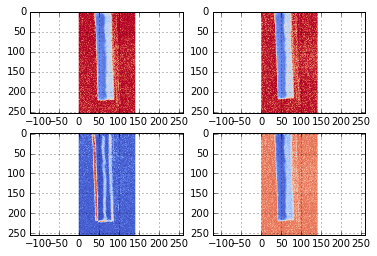

In [106]:
ird.imshow(im0, im1, result['timg']);

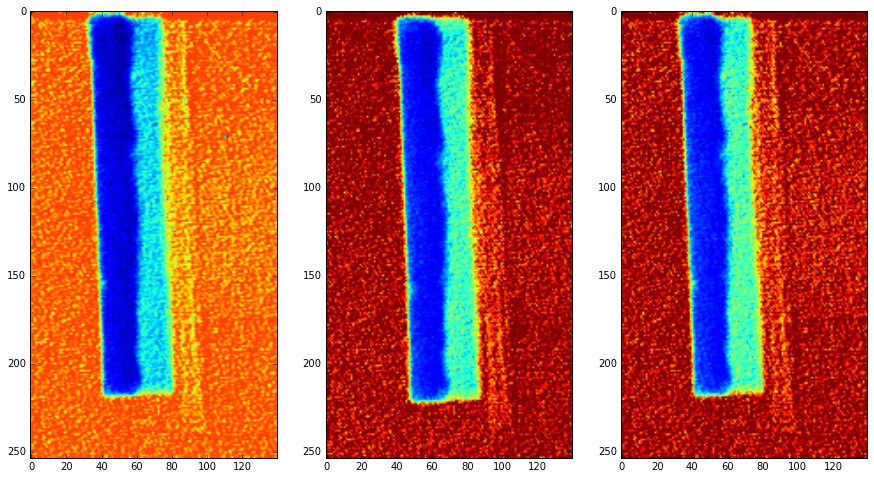

In [91]:
plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(result['timg'])
plt.subplot(132)
plt.imshow(im0)
plt.subplot(133)
plt.imshow(im1)